# Processamento Estatístico de Sinais - TI 0124 - Trabalho computacional 2

## Prof. Charles Casimiro Cavalcante, Dr.
## Wireless Telecommunications Research Group - GTEL
## Department of Teleinformatics Engineering - DETI
## Federal University of Ceará (UFC) - Brazil
## URL: [charlescasimiro.github.io](https://charlescasimiro.github.io/)

## Alunos:

- Paulo Ricardo Menezes Soares - 537440
- Pedro Leinos Falcão Cunha - 542114
- Kelvin Leandro Martins - 540006


# Dados utilizados

In [1]:
# sinais e biblioteca para ler o sinal
# TNMG80_N1
!gdown 1yWDRx7jWQ4l75TV3GrPIJp1pngQLhOnJ
!gdown 10Wkzl0farVwjkKrdPWYj6T0UTnLwwgV2

# TNMG82_N1
!gdown 1cKTODA77w-1bu3A7wNQxuORlbOOakkwu
!gdown 18huexFn5RibZ-GHmO3J6xisi_41bhZYo

# X.mat
!gdown 1YYNwPgQPTyAd7Q5wFGx_cxkaN3sxEiet

!pip install wfdb

Downloading...
From: https://drive.google.com/uc?id=1yWDRx7jWQ4l75TV3GrPIJp1pngQLhOnJ
To: /content/TNMG80_N1.dat
100% 35.2k/35.2k [00:00<00:00, 66.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=10Wkzl0farVwjkKrdPWYj6T0UTnLwwgV2
To: /content/TNMG80_N1.hea
100% 429/429 [00:00<00:00, 1.44MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cKTODA77w-1bu3A7wNQxuORlbOOakkwu
To: /content/TNMG82_N1.dat
100% 53.8k/53.8k [00:00<00:00, 77.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=18huexFn5RibZ-GHmO3J6xisi_41bhZYo
To: /content/TNMG82_N1.hea
100% 533/533 [00:00<00:00, 2.33MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1YYNwPgQPTyAd7Q5wFGx_cxkaN3sxEiet
From (redirected): https://drive.google.com/uc?id=1YYNwPgQPTyAd7Q5wFGx_cxkaN3sxEiet&confirm=t&uuid=3dc57cb4-2dc7-4e35-88c8-9c2e4512c40c
To: /content/X.mat
100% 1.69M/1.69M [00:00<00:00, 150MB/s]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.9 MB/s eta 0:00:00


# Importando Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
from sklearn.decomposition import PCA

# Leitura dos dados

In [3]:
record = wfdb.rdrecord('TNMG80_N1')
signal = record.p_signal
sig_name = record.sig_name
fs = record.fs

print("12-Lead ECG")
print(f"Taxa de amostragem: {fs} Hz")
print(f"Duração do sinal: {signal.shape[0] // fs}s")
print(f"Canais: {sig_name}")

12-Lead ECG
Taxa de amostragem: 300 Hz
Duração do sinal: 7s
Canais: ['DI', 'DII', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']


In [ ]:
# from scipy.io import loadmat
# X = loadmat('X.mat')['X']
# signal = X.T

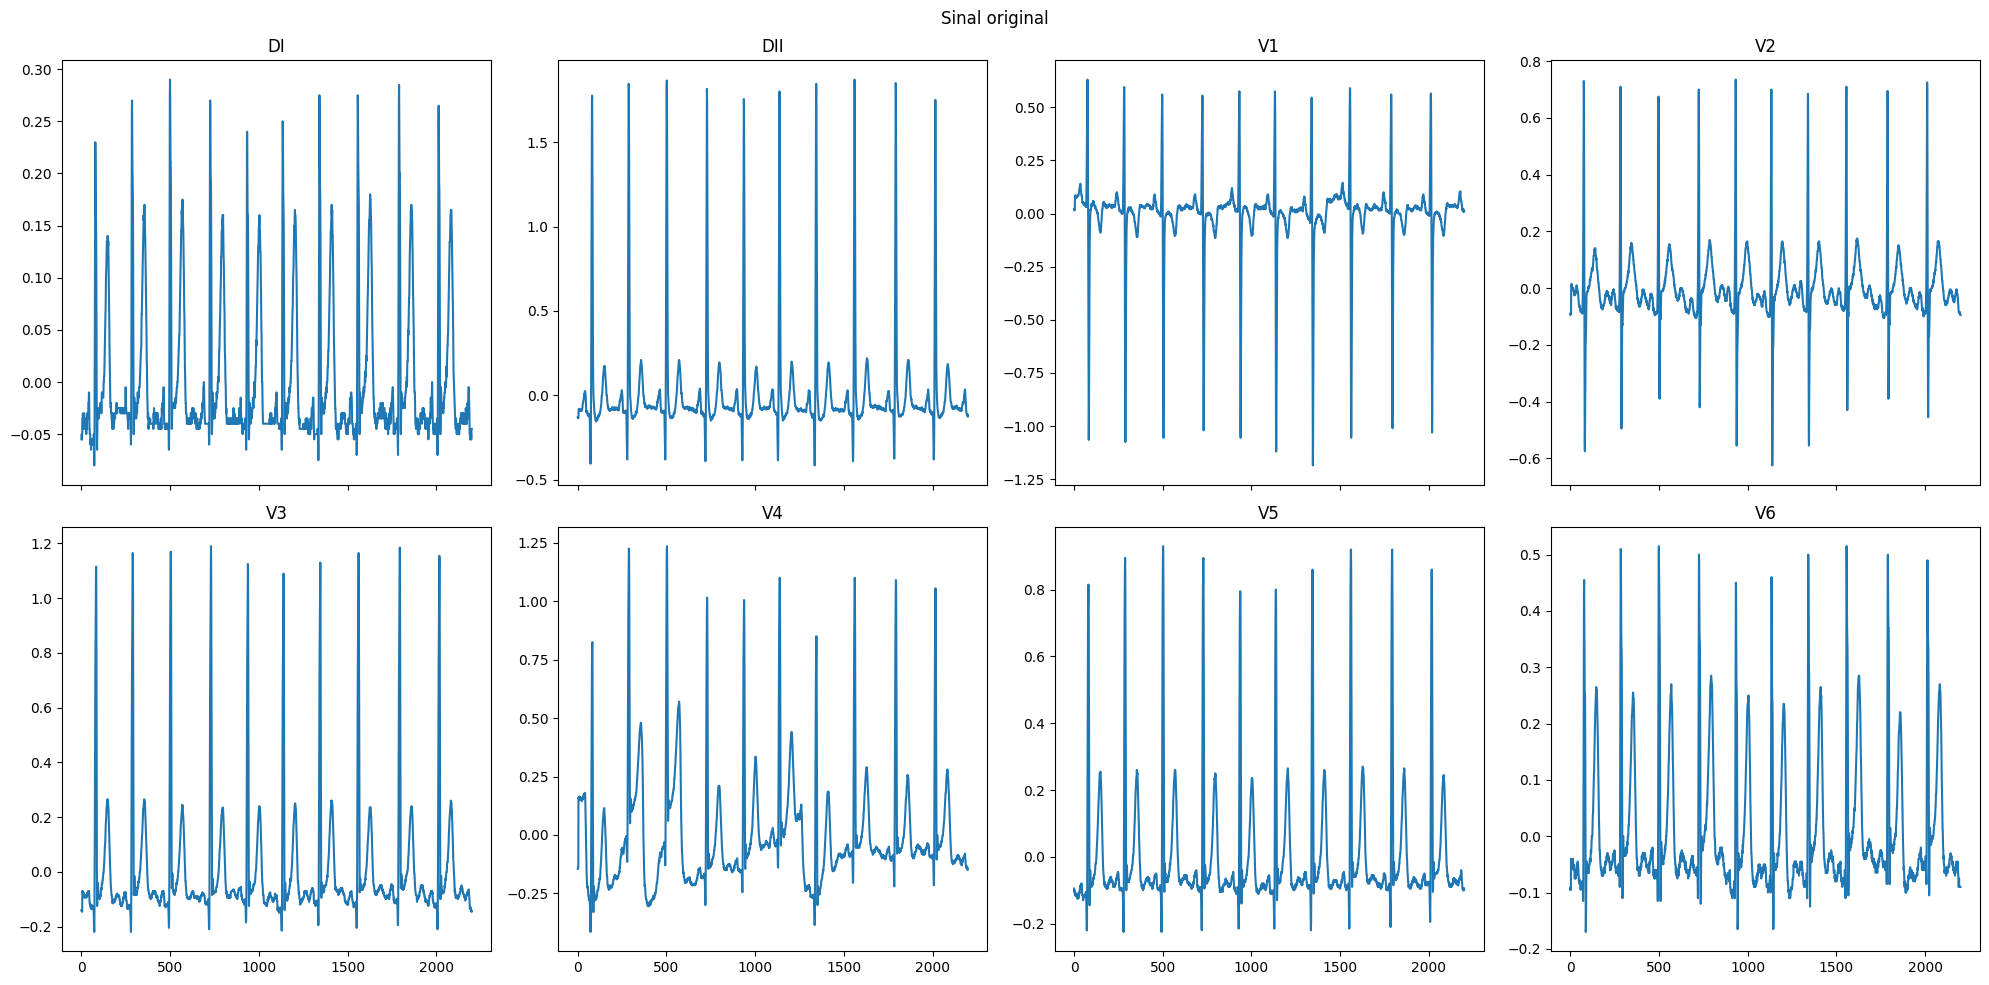

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(signal[:, i])
    ax.set_title(sig_name[i])

plt.suptitle("Sinal original")
plt.tight_layout()
plt.show()

Os 4 canais restantes são apenas combinações lineares entre DI, DII e DIII. Por este motivo, não iremos adicionar esses canais.

$DIII = DII - DI$ (Lei de Enthoven)

(equações de Goldberger)

$aVL = \frac{DI - DIII}{2}$

$-aVR = \frac{DI + DII}{2}$

$aVF = \frac{DII + DIII}{2}$

# 1. Implementar a transformada de Karhunen-Loeve de um sinal arbitrário

In [54]:
def KLT(signal):
    # Normaliza o sinal subtraindo a média e dividindo pelo desvio padrão
    signal = (signal - np.mean(signal, axis=0)) / np.std(signal, axis=0)

    # Calcula a matriz de covariância
    cov_matrix = np.cov(signal, rowvar=False)

    # Realiza a Decomposição em Valores Singulares (SVD) na matriz de covariância
    u, L, vh = np.linalg.svd(cov_matrix)

    # Extrai a matriz de transformação (autovetores)
    V = vh.T

    # Transforma o sinal para a nova base
    new_signal = np.dot(signal, V)

    return new_signal, L, V

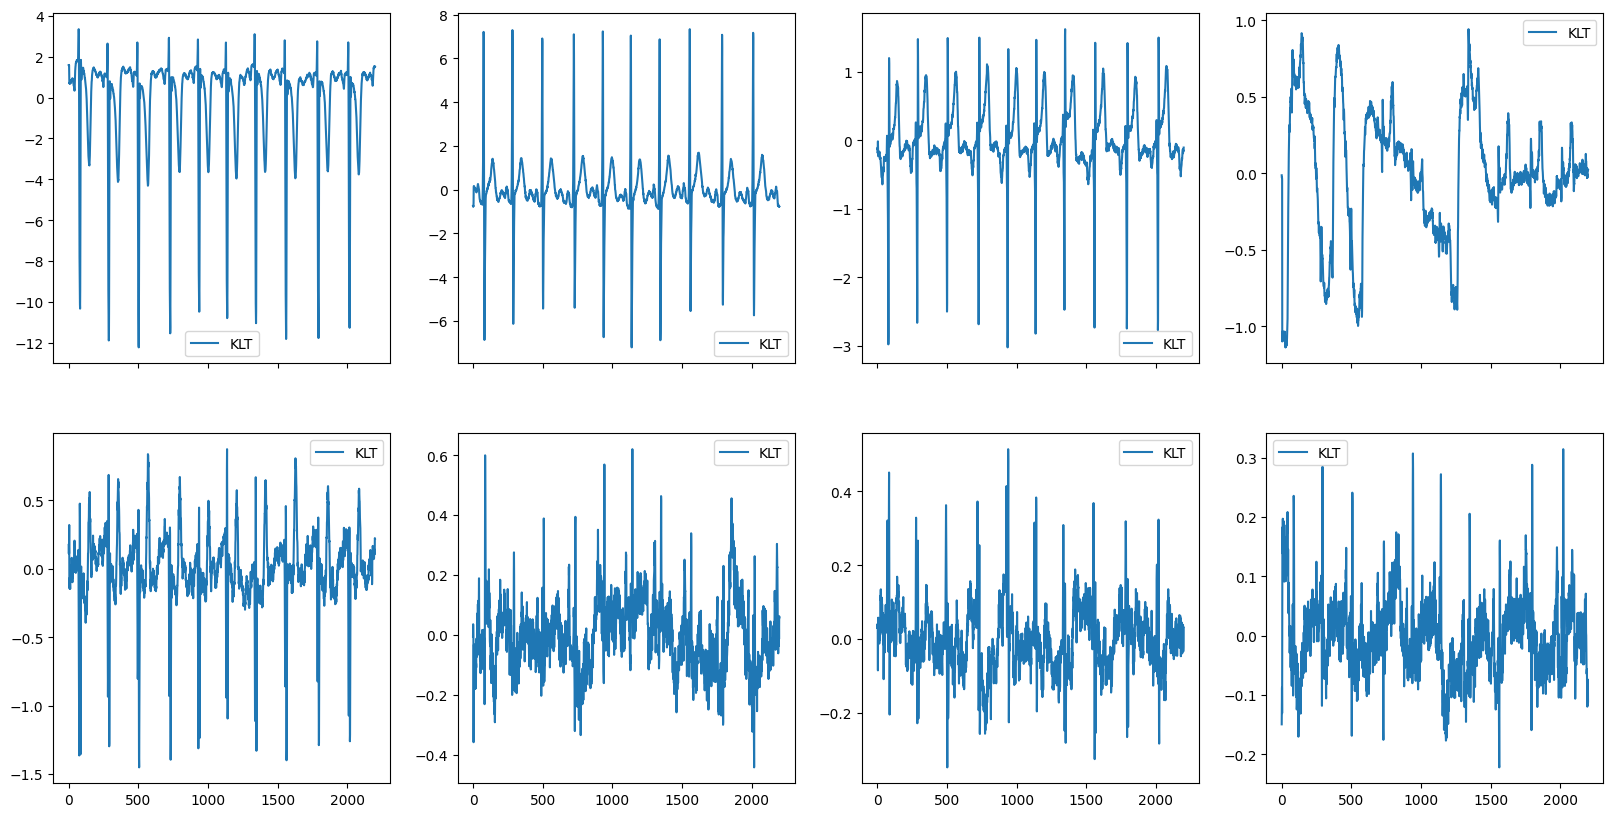

In [55]:
signal = record.p_signal
new_signal, L, basis = KLT(signal)

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(new_signal[:, i], label='KLT')
    ax.legend()

plt.show()

In [50]:
basis

array([[-0.38956975,  0.23308489,  0.26549795,  0.13971193,  0.49666494,
         0.59606641,  0.27916852,  0.15489345],
       [-0.38320579, -0.16973959, -0.64931579,  0.14393994, -0.07160008,
         0.23028545, -0.42304896,  0.38063592],
       [ 0.23077285,  0.56488824, -0.63373113, -0.08154573,  0.26338765,
        -0.14731905,  0.35688039, -0.03067147],
       [-0.04779394,  0.722525  ,  0.17528419, -0.02678403, -0.54546936,
         0.21708931, -0.31553895, -0.00141951],
       [-0.4125141 , -0.07741421, -0.05597748,  0.15798145, -0.54410791,
        -0.1505806 ,  0.67709542,  0.1362402 ],
       [-0.38958313, -0.00968803, -0.00143773, -0.91756909,  0.04186071,
        -0.06601291, -0.00382959, -0.00844563],
       [-0.41817432,  0.00950568, -0.16312438,  0.18904919,  0.04485838,
        -0.01244389, -0.1037701 , -0.86588415],
       [-0.38605143,  0.26370746,  0.21404448,  0.22307847,  0.2854286 ,
        -0.7040282 , -0.2166217 ,  0.24858293]])

# 2. Implementar a análise de componentes principais (PCA) de ordem K e mostrar o novo conjunto de dados nessa dimensão.

In [51]:
print(f"Ortonormalidade de V (V @ V.T = Identidade):\n{V @ V.T }")

Ortonormalidade de V (V @ V.T = Identidade):
[[ 1.00000000e+00 -9.70584056e-17 -4.80417917e-17  3.76370038e-16
   5.18199069e-17  3.40177936e-17  1.61686367e-16  4.30556781e-16]
 [-9.70584056e-17  1.00000000e+00  5.00437878e-16 -3.63326858e-16
   4.62063477e-16 -9.24462591e-17  4.73600245e-16 -5.65997436e-16]
 [-4.80417917e-17  5.00437878e-16  1.00000000e+00  2.77453356e-16
  -4.17254636e-17  1.14042614e-16 -1.34462411e-16 -1.60117014e-18]
 [ 3.76370038e-16 -3.63326858e-16  2.77453356e-16  1.00000000e+00
  -3.17503562e-16 -2.26189497e-16  2.59671507e-16  3.79647367e-16]
 [ 5.18199069e-17  4.62063477e-16 -4.17254636e-17 -3.17503562e-16
   1.00000000e+00 -4.58177336e-16  1.44733848e-16  7.44345470e-16]
 [ 3.40177936e-17 -9.24462591e-17  1.14042614e-16 -2.26189497e-16
  -4.58177336e-16  1.00000000e+00 -8.25105841e-17  1.31376759e-16]
 [ 1.61686367e-16  4.73600245e-16 -1.34462411e-16  2.59671507e-16
   1.44733848e-16 -8.25105841e-17  1.00000000e+00 -2.35775302e-16]
 [ 4.30556781e-16 -5.659

In [52]:
Variance_Explained_i = L / np.sum(L) # Variancia explicada pelo i-esimo autovalor
Variance_Explained_q = np.cumsum(L) / np.sum(L) # Variancia explicada pelos q primeiros autovalores

print(f'Variancia explicada pelo i-esimo autovalor:\n{Variance_Explained_i}\n')
print(f'Variancia explicada pelos \'q\' primeiros autovalores:\n{Variance_Explained_q}')

Variancia explicada pelo i-esimo autovalor:
[7.02581780e-01 2.28410393e-01 3.41175796e-02 2.17585292e-02
 9.75244492e-03 1.78109614e-03 1.06170078e-03 5.36476313e-04]

Variancia explicada pelos 'q' primeiros autovalores:
[0.70258178 0.93099217 0.96510975 0.98686828 0.99662073 0.99840182
 0.99946352 1.        ]


In [53]:
print('Comparacao da transposta com a inversa:\n')
print(f'Matriz transposta de V:\n{V.T}\n')
print(f'Matriz inversa de V:\n{np.linalg.inv(V)}')

Comparacao da transposta com a inversa:

Matriz transposta de V:
[[-0.38956975 -0.38320579  0.23077285 -0.04779394 -0.4125141  -0.38958313
  -0.41817432 -0.38605143]
 [ 0.23308489 -0.16973959  0.56488824  0.722525   -0.07741421 -0.00968803
   0.00950568  0.26370746]
 [ 0.26549795 -0.64931579 -0.63373113  0.17528419 -0.05597748 -0.00143773
  -0.16312438  0.21404448]
 [ 0.13971193  0.14393994 -0.08154573 -0.02678403  0.15798145 -0.91756909
   0.18904919  0.22307847]
 [ 0.49666494 -0.07160008  0.26338765 -0.54546936 -0.54410791  0.04186071
   0.04485838  0.2854286 ]
 [ 0.59606641  0.23028545 -0.14731905  0.21708931 -0.1505806  -0.06601291
  -0.01244389 -0.7040282 ]
 [ 0.27916852 -0.42304896  0.35688039 -0.31553895  0.67709542 -0.00382959
  -0.1037701  -0.2166217 ]
 [ 0.15489345  0.38063592 -0.03067147 -0.00141951  0.1362402  -0.00844563
  -0.86588415  0.24858293]]

Matriz inversa de V:
[[-0.38956975 -0.38320579  0.23077285 -0.04779394 -0.4125141  -0.38958313
  -0.41817432 -0.38605143]
 [ 

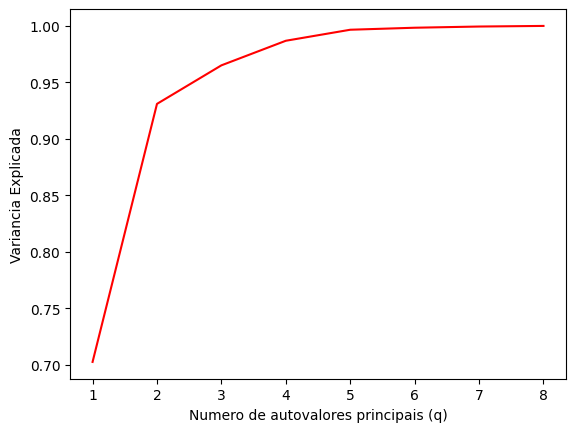

In [38]:
plt.plot(range(1, len(Variance_Explained_q)+1), Variance_Explained_q, 'r-')
plt.xlabel("Numero de autovalores principais (q)")
plt.ylabel('Variancia Explicada')
plt.show()

In [39]:
def plot_pca(sig, k, plot=True):
  sig_k = sig[:, :k]

  if plot:
    if k == 1:
      plt.plot(sig_k)
    elif k == 2:
      plt.scatter(sig_k[:, 0], sig_k[:, 1])
    elif k == 3:
      fig = plt.figure()
      ax = fig.add_subplot(projection='3d')
      ax.scatter(sig_k[:, 0], sig_k[:, 1], sig_k[:,2])

  return sig_k

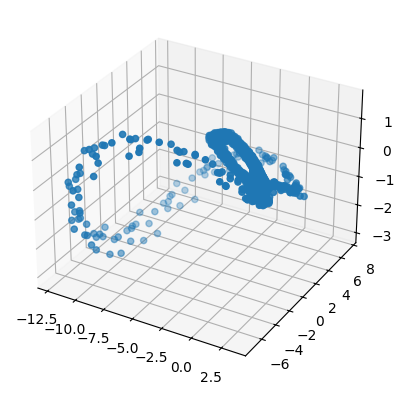

In [40]:
plot_pca(new_signal, k=3)
plt.show()